In [1]:
# ============================================================================
# CELL 1: IMPORT LIBRARIES
# ============================================================================
"""
Import libraries untuk feature engineering dan preprocessing.
"""

# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Preprocessing & encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import warnings
import json
import os
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plot settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['savefig.dpi'] = 300

print("="*80)
print("✅ All libraries imported successfully!")
print("="*80)

✅ All libraries imported successfully!


In [2]:
# ============================================================================
# CELL 2: LOAD RAW DATASET
# ============================================================================
"""
Load dataset yang sudah dianalisis di Notebook 01.
"""

print("\n" + "="*80)
print("📂 LOADING DATASET")
print("="*80)

# Load data
file_path = '../data/raw/drug_consumption_raw.csv'
df = pd.read_csv(file_path)

print(f"✅ Dataset loaded: {file_path}")
print(f"   Shape: {df.shape}")
print(f"   Samples: {len(df):,} responden")
print(f"   Features: {len(df.columns)} columns")

# Show first few rows
print("\n📊 Sample data:")
print("-"*80)
display(df.head(3))


📂 LOADING DATASET
✅ Dataset loaded: ../data/raw/drug_consumption_raw.csv
   Shape: (1885, 32)
   Samples: 1,885 responden
   Features: 32 columns

📊 Sample data:
--------------------------------------------------------------------------------


,ID,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


In [3]:
# ============================================================================
# CELL 3: DEFINE FEATURE GROUPS & MAPPINGS
# ============================================================================
"""
Definisikan kelompok features dan mapping values.
"""

print("\n" + "="*80)
print("📋 DEFINING FEATURE GROUPS & MAPPINGS")
print("="*80)

# Feature groups
demographic_cols = ['age', 'gender', 'education', 'country', 'ethnicity']
personality_cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
behavioral_cols = ['Impulsive', 'SS']
legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']
illegal_drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 
                 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 
                 'Meth', 'Mushrooms', 'Semer']

print("\n1️⃣ Feature Groups:")
print(f"   • Demographics: {len(demographic_cols)} features")
print(f"   • Personality: {len(personality_cols)} features")
print(f"   • Behavioral: {len(behavioral_cols)} features")
print(f"   • Legal drugs: {len(legal_drugs)} drugs")
print(f"   • Illegal drugs: {len(illegal_drugs)} drugs")

# Demographic mappings (dari Notebook 01)
AGE_MAPPING = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+'
}

GENDER_MAPPING = {
    -0.48246: 'Male',
    0.48246: 'Female'
}

EDUCATION_MAPPING = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university',
    -0.05921: 'Professional certificate/diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'
}

COUNTRY_MAPPING = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

ETHNICITY_MAPPING = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

# Drug value mapping (categorical to numeric)
DRUG_VALUE_MAPPING = {
    'CL0': 0.0,   # Never Used
    'CL1': 0.13,  # Used over a Decade Ago
    'CL2': 0.35,  # Used in Last Decade
    'CL3': 0.71,  # Used in Last Year
    'CL4': 0.79,  # Used in Last Month
    'CL5': 0.92,  # Used in Last Week
    'CL6': 1.0    # Used in Last Day
}

print("\n2️⃣ Mappings defined:")
print(f"   ✅ Age: {len(AGE_MAPPING)} categories")
print(f"   ✅ Gender: {len(GENDER_MAPPING)} categories")
print(f"   ✅ Education: {len(EDUCATION_MAPPING)} levels")
print(f"   ✅ Country: {len(COUNTRY_MAPPING)} countries")
print(f"   ✅ Ethnicity: {len(ETHNICITY_MAPPING)} groups")
print(f"   ✅ Drug values: {len(DRUG_VALUE_MAPPING)} levels")


📋 DEFINING FEATURE GROUPS & MAPPINGS

1️⃣ Feature Groups:
   • Demographics: 5 features
   • Personality: 5 features
   • Behavioral: 2 features
   • Legal drugs: 4 drugs
   • Illegal drugs: 14 drugs

2️⃣ Mappings defined:
   ✅ Age: 6 categories
   ✅ Gender: 2 categories
   ✅ Education: 9 levels
   ✅ Country: 7 countries
   ✅ Ethnicity: 7 groups
   ✅ Drug values: 7 levels


In [4]:
# ============================================================================
# CELL 4: APPLY DEMOGRAPHIC MAPPINGS
# ============================================================================
"""
Convert demographic numeric values to categorical labels.
"""

print("\n" + "="*80)
print("🔄 APPLYING DEMOGRAPHIC MAPPINGS")
print("="*80)

# Apply mappings
df['Age_Category'] = df['age'].map(AGE_MAPPING)
df['Gender_Category'] = df['gender'].map(GENDER_MAPPING)
df['Education_Category'] = df['education'].map(EDUCATION_MAPPING)
df['Country_Category'] = df['country'].map(COUNTRY_MAPPING)
df['Ethnicity_Category'] = df['ethnicity'].map(ETHNICITY_MAPPING)

# Verify mappings
print("\n✅ Demographic mappings applied:")
print("-"*80)

for col, mapped_col in [
    ('age', 'Age_Category'),
    ('gender', 'Gender_Category'),
    ('education', 'Education_Category'),
    ('country', 'Country_Category'),
    ('ethnicity', 'Ethnicity_Category')
]:
    null_count = df[mapped_col].isnull().sum()
    unique_count = df[mapped_col].nunique()
    
    if null_count > 0:
        print(f"⚠️  {col:12s} → {mapped_col:20s}: {unique_count} categories, {null_count} NULL values!")
    else:
        print(f"✅ {col:12s} → {mapped_col:20s}: {unique_count} categories")

# Show sample
print("\n📊 Sample mapped demographics:")
print("-"*80)
display(df[['age', 'Age_Category', 'gender', 'Gender_Category', 
            'education', 'Education_Category']].head(3))
    


🔄 APPLYING DEMOGRAPHIC MAPPINGS

✅ Demographic mappings applied:
--------------------------------------------------------------------------------
✅ age          → Age_Category        : 6 categories
✅ gender       → Gender_Category     : 2 categories
✅ education    → Education_Category  : 9 categories
✅ country      → Country_Category    : 7 categories
✅ ethnicity    → Ethnicity_Category  : 7 categories

📊 Sample mapped demographics:
--------------------------------------------------------------------------------


,age,Age_Category,gender,Gender_Category,education,Education_Category
0,0.49788,35-44,0.48246,Female,-0.05921,Professional certificate/diploma
1,-0.07854,25-34,-0.48246,Male,1.98437,Doctorate degree
2,0.49788,35-44,-0.48246,Male,-0.05921,Professional certificate/diploma


In [5]:
# ============================================================================
# CELL 4: APPLY DEMOGRAPHIC MAPPINGS
# ============================================================================
"""
Convert demographic numeric values to categorical labels.
"""

print("\n" + "="*80)
print("🔄 APPLYING DEMOGRAPHIC MAPPINGS")
print("="*80)

# Apply mappings
df['Age_Category'] = df['age'].map(AGE_MAPPING)
df['Gender_Category'] = df['gender'].map(GENDER_MAPPING)
df['Education_Category'] = df['education'].map(EDUCATION_MAPPING)
df['Country_Category'] = df['country'].map(COUNTRY_MAPPING)
df['Ethnicity_Category'] = df['ethnicity'].map(ETHNICITY_MAPPING)

# Verify mappings
print("\n✅ Demographic mappings applied:")
print("-"*80)

for col, mapped_col in [
    ('age', 'Age_Category'),
    ('gender', 'Gender_Category'),
    ('education', 'Education_Category'),
    ('country', 'Country_Category'),
    ('ethnicity', 'Ethnicity_Category')
]:
    null_count = df[mapped_col].isnull().sum()
    unique_count = df[mapped_col].nunique()
    
    if null_count > 0:
        print(f"⚠️  {col:12s} → {mapped_col:20s}: {unique_count} categories, {null_count} NULL values!")
    else:
        print(f"✅ {col:12s} → {mapped_col:20s}: {unique_count} categories")

# Show sample
print("\n📊 Sample mapped demographics:")
print("-"*80)
display(df[['age', 'Age_Category', 'gender', 'Gender_Category', 
            'education', 'Education_Category']].head(3))



🔄 APPLYING DEMOGRAPHIC MAPPINGS

✅ Demographic mappings applied:
--------------------------------------------------------------------------------
✅ age          → Age_Category        : 6 categories
✅ gender       → Gender_Category     : 2 categories
✅ education    → Education_Category  : 9 categories
✅ country      → Country_Category    : 7 categories
✅ ethnicity    → Ethnicity_Category  : 7 categories

📊 Sample mapped demographics:
--------------------------------------------------------------------------------


,age,Age_Category,gender,Gender_Category,education,Education_Category
0,0.49788,35-44,0.48246,Female,-0.05921,Professional certificate/diploma
1,-0.07854,25-34,-0.48246,Male,1.98437,Doctorate degree
2,0.49788,35-44,-0.48246,Male,-0.05921,Professional certificate/diploma


In [6]:
# ============================================================================
# CELL 5: CONVERT DRUGS TO NUMERIC VALUES
# ============================================================================
"""
Convert drug categorical values (CL0-CL6) to numeric (0.0-1.0).
"""

print("\n" + "="*80)
print("💊 CONVERTING DRUG VALUES TO NUMERIC")
print("="*80)

all_drugs = legal_drugs + illegal_drugs

# Convert all drugs to numeric
print("Converting drug values...")
for drug in all_drugs:
    numeric_col = f'{drug}_numeric'
    if numeric_col not in df.columns:
        df[numeric_col] = df[drug].map(DRUG_VALUE_MAPPING)

print(f"✅ {len(all_drugs)} drugs converted to numeric values")

# Verify conversion
print("\n📊 Sample drug conversions:")
print("-"*80)
sample_drugs = ['Cannabis', 'Alcohol', 'Ecstasy']
for drug in sample_drugs:
    print(f"\n{drug}:")
    print(f"   Categorical: {df[drug].value_counts().head(3).to_dict()}")
    print(f"   Numeric range: [{df[f'{drug}_numeric'].min():.2f}, {df[f'{drug}_numeric'].max():.2f}]")
    print(f"   Mean: {df[f'{drug}_numeric'].mean():.3f}")


💊 CONVERTING DRUG VALUES TO NUMERIC
Converting drug values...
✅ 18 drugs converted to numeric values

📊 Sample drug conversions:
--------------------------------------------------------------------------------

Cannabis:
   Categorical: {'CL6': 463, 'CL0': 413, 'CL2': 266}
   Numeric range: [0.00, 1.00]
   Mean: 0.538

Alcohol:
   Categorical: {'CL5': 759, 'CL6': 505, 'CL4': 287}
   Numeric range: [0.00, 1.00]
   Mean: 0.848

Ecstasy:
   Categorical: {'CL0': 1021, 'CL3': 277, 'CL2': 234}
   Numeric range: [0.00, 1.00]
   Mean: 0.263


In [7]:
# ============================================================================
# CELL 6: BINARY TARGET CREATION (FORMAL)
# ============================================================================
"""
⚠️ KRUSIAL: Create binary target variable.

Definition:
- Non-Recent Use (0): Value ≤ 0.5 (CL0, CL1, CL2)
- Recent Use (1): Value > 0.5 (CL3, CL4, CL5, CL6)

Logic:
- User (1): Minimal 1 dari 14 illegal drugs > 0.5
- Non-User (0): Semua 14 illegal drugs ≤ 0.5
"""

print("\n" + "="*80)
print("🎯 BINARY TARGET CREATION (FORMAL)")
print("="*80)

# Threshold definition
THRESHOLD = 0.5

print(f"\n📋 Binary Classification Definition:")
print("-"*80)
print(f"Threshold: {THRESHOLD}")
print("\nNon-Recent Use (Class 0):")
print("   • CL0: Never Used (value = 0.0)")
print("   • CL1: Used over Decade Ago (value = 0.13)")
print("   • CL2: Used in Last Decade (value = 0.35)")
print(f"   • Condition: All illegal drugs ≤ {THRESHOLD}")

print("\nRecent Use (Class 1):")
print("   • CL3: Used in Last Year (value = 0.71)")
print("   • CL4: Used in Last Month (value = 0.79)")
print("   • CL5: Used in Last Week (value = 0.92)")
print("   • CL6: Used in Last Day (value = 1.0)")
print(f"   • Condition: At least 1 illegal drug > {THRESHOLD}")

# Create binary target
illegal_drugs_numeric = [f'{drug}_numeric' for drug in illegal_drugs]

# Check if any illegal drug > threshold
df['Drug_User'] = (df[illegal_drugs_numeric] > THRESHOLD).any(axis=1).astype(int)

# Distribution
target_counts = df['Drug_User'].value_counts().sort_index()
target_pct = (target_counts / len(df) * 100)

print("\n" + "="*80)
print("📊 BINARY TARGET DISTRIBUTION")
print("="*80)

print(f"\nClass 0 (Non-User):  {target_counts[0]:4d} samples ({target_pct[0]:5.2f}%)")
print(f"Class 1 (User):      {target_counts[1]:4d} samples ({target_pct[1]:5.2f}%)")
print(f"Total:               {len(df):4d} samples (100.00%)")

# Imbalance analysis
imbalance_ratio = target_counts[0] / target_counts[1] if target_counts[1] > 0 else 0
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("⚠️  Moderate imbalance detected")
    print("   → Will apply SMOTE/ADASYN in Notebook 05")
elif imbalance_ratio > 2.0:
    print("⚠️  Significant imbalance detected")
    print("   → SMOTE/ADASYN highly recommended")
else:
    print("✅ Classes are relatively balanced")
    print("   → SMOTE/ADASYN optional, but still recommended for comparison")

# Verify logic
print("\n🔍 Verification:")
print("-"*80)

# Sample verification for Class 1
user_sample = df[df['Drug_User'] == 1].iloc[0]
print("Sample User (Class 1):")
for drug in illegal_drugs[:5]:  # Show first 5
    value = user_sample[f'{drug}_numeric']
    status = "✓ RECENT" if value > THRESHOLD else "✗ non-recent"
    print(f"   {drug:12s}: {value:.2f} {status}")

print("\n" + "-"*80)

# Sample verification for Class 0
nonuser_sample = df[df['Drug_User'] == 0].iloc[0]
print("Sample Non-User (Class 0):")
for drug in illegal_drugs[:5]:
    value = nonuser_sample[f'{drug}_numeric']
    status = "✓ RECENT" if value > THRESHOLD else "✗ non-recent"
    print(f"   {drug:12s}: {value:.2f} {status}")

print("\n✅ Binary target created successfully!")


🎯 BINARY TARGET CREATION (FORMAL)

📋 Binary Classification Definition:
--------------------------------------------------------------------------------
Threshold: 0.5

Non-Recent Use (Class 0):
   • CL0: Never Used (value = 0.0)
   • CL1: Used over Decade Ago (value = 0.13)
   • CL2: Used in Last Decade (value = 0.35)
   • Condition: All illegal drugs ≤ 0.5

Recent Use (Class 1):
   • CL3: Used in Last Year (value = 0.71)
   • CL4: Used in Last Month (value = 0.79)
   • CL5: Used in Last Week (value = 0.92)
   • CL6: Used in Last Day (value = 1.0)
   • Condition: At least 1 illegal drug > 0.5

📊 BINARY TARGET DISTRIBUTION

Class 0 (Non-User):   710 samples (37.67%)
Class 1 (User):      1175 samples (62.33%)
Total:               1885 samples (100.00%)

Imbalance Ratio: 0.60:1
✅ Classes are relatively balanced
   → SMOTE/ADASYN optional, but still recommended for comparison

🔍 Verification:
--------------------------------------------------------------------------------
Sample User (Cla

In [14]:
# ============================================================================
# CELL 7: FEATURE ENCODING - AGE & EDUCATION (ORDINAL)
# ============================================================================
"""
Encode Age and Education sebagai ordinal (ada urutan).
"""

print("\n" + "="*80)
print("ORDINAL ENCODING: AGE & EDUCATION")
print("="*80)

# Age ordering (youngest to oldest)
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_encoding = {age: idx for idx, age in enumerate(age_order)}

df['Age_Encoded'] = df['Age_Category'].map(age_encoding)

print("\n1️⃣ Age Encoding:")
print("-"*80)
print("Order: youngest → oldest")
for age, code in age_encoding.items():
    count = (df['Age_Category'] == age).sum()
    print(f"   {code} = {age:10s} (n={count:4d})")

# Education ordering (lowest to highest)
education_order = [
    'Left school before 16 years',
    'Left school at 16 years',
    'Left school at 17 years',
    'Left school at 18 years',
    'Some college or university',
    'Professional certificate/diploma',
    'University degree',
    'Masters degree',
    'Doctorate degree'
]
education_encoding = {edu: idx for idx, edu in enumerate(education_order)}

df['Education_Encoded'] = df['Education_Category'].map(education_encoding)

print("\nEducation Encoding:")
print("-"*80)
print("Order: lowest → highest")
for edu, code in education_encoding.items():
    count = (df['Education_Category'] == edu).sum()
    print(f"   {code} = {edu:40s} (n={count:4d})")

# Verify encoding
print("\nOrdinal encoding completed:")
print(f"   • Age: {df['Age_Encoded'].nunique()} unique values (0-{df['Age_Encoded'].max()})")
print(f"   • Education: {df['Education_Encoded'].nunique()} unique values (0-{df['Education_Encoded'].max()})")

# Check for nulls
age_nulls = df['Age_Encoded'].isnull().sum()
edu_nulls = df['Education_Encoded'].isnull().sum()

if age_nulls > 0:
    print(f"   ⚠️  Age: {age_nulls} NULL values detected!")
if edu_nulls > 0:
    print(f"   ⚠️  Education: {edu_nulls} NULL values detected!")


ORDINAL ENCODING: AGE & EDUCATION

1️⃣ Age Encoding:
--------------------------------------------------------------------------------
Order: youngest → oldest
   0 = 18-24      (n= 643)
   1 = 25-34      (n= 481)
   2 = 35-44      (n= 356)
   3 = 45-54      (n= 294)
   4 = 55-64      (n=  93)
   5 = 65+        (n=  18)

Education Encoding:
--------------------------------------------------------------------------------
Order: lowest → highest
   0 = Left school before 16 years              (n=  28)
   1 = Left school at 16 years                  (n=  99)
   2 = Left school at 17 years                  (n=  30)
   3 = Left school at 18 years                  (n= 100)
   4 = Some college or university               (n= 506)
   5 = Professional certificate/diploma         (n= 270)
   6 = University degree                        (n= 480)
   7 = Masters degree                           (n= 283)
   8 = Doctorate degree                         (n=  89)

Ordinal encoding completed:
   • Age: 

In [21]:
# ============================================================================
# CELL 8: FEATURE ENCODING - GENDER (BINARY)
# ============================================================================
"""
Encode Gender sebagai binary (0/1).
"""

print("\n" + "="*80)
print("⚡ BINARY ENCODING: GENDER")
print("="*80)

# Simple binary encoding
gender_encoding = {'Male': 1, 'Female': 0}
df['Gender_Encoded'] = df['Gender_Category'].map(gender_encoding)

print("\nGender Encoding:")
print("-"*80)
for gender, code in gender_encoding.items():
    count = (df['Gender_Category'] == gender).sum()
    pct = count / len(df) * 100
    print(f"   {code} = {gender:8s} (n={count:4d}, {pct:5.2f}%)")

print(f"\n✅ Binary encoding completed:")
print(f"   • Gender: {df['Gender_Encoded'].nunique()} unique values")
print(f"   • Distribution: {df['Gender_Encoded'].value_counts().to_dict()}")

# Verify
gender_nulls = df['Gender_Encoded'].isnull().sum()
if gender_nulls > 0:
    print(f"   ⚠️  {gender_nulls} NULL values detected!")


⚡ BINARY ENCODING: GENDER

Gender Encoding:
--------------------------------------------------------------------------------
   1 = Male     (n= 943, 50.03%)
   0 = Female   (n= 942, 49.97%)

✅ Binary encoding completed:
   • Gender: 2 unique values
   • Distribution: {1: 943, 0: 942}


In [22]:
# ============================================================================
# CELL 9: FEATURE ENCODING - COUNTRY & ETHNICITY (ONE-HOT)
# ============================================================================
"""
One-hot encoding untuk Country and Ethnicity (nominal, tidak ada urutan).
"""

print("\n" + "="*80)
print("🌍 ONE-HOT ENCODING: COUNTRY & ETHNICITY")
print("="*80)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Country_Category', 'Ethnicity_Category'], 
                             drop_first=True, prefix=['Country', 'Ethnicity'])

print("\n1️⃣ Country One-Hot Encoding:")
print("-"*80)
country_cols = [col for col in df_encoded.columns if col.startswith('Country_')]
print(f"   • Original categories: {df['Country_Category'].nunique()}")
print(f"   • One-hot columns created: {len(country_cols)} (drop_first=True)")
print(f"   • Columns: {country_cols}")

print("\n2️⃣ Ethnicity One-Hot Encoding:")
print("-"*80)
ethnicity_cols = [col for col in df_encoded.columns if col.startswith('Ethnicity_')]
print(f"   • Original categories: {df['Ethnicity_Category'].nunique()}")
print(f"   • One-hot columns created: {len(ethnicity_cols)} (drop_first=True)")
print(f"   • Columns: {ethnicity_cols}")

print(f"\n✅ One-hot encoding completed:")
print(f"   • Total new columns: {len(country_cols) + len(ethnicity_cols)}")
print(f"   • Dataset shape: {df.shape} → {df_encoded.shape}")

# Update dataframe
df = df_encoded.copy()


🌍 ONE-HOT ENCODING: COUNTRY & ETHNICITY

1️⃣ Country One-Hot Encoding:
--------------------------------------------------------------------------------
   • Original categories: 7
   • One-hot columns created: 6 (drop_first=True)
   • Columns: ['Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Country_UK', 'Country_USA']

2️⃣ Ethnicity One-Hot Encoding:
--------------------------------------------------------------------------------
   • Original categories: 7
   • One-hot columns created: 6 (drop_first=True)
   • Columns: ['Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White']

✅ One-hot encoding completed:
   • Total new columns: 12
   • Dataset shape: (1885, 59) → (1885, 69)


In [24]:
# ============================================================================
# CELL 10: SELECT FINAL FEATURES FOR MODELING
# ============================================================================
"""
Pilih features yang akan digunakan untuk modeling.
"""

print("\n" + "="*80)
print("🎯 SELECTING FINAL FEATURES")
print("="*80)

# Feature groups untuk modeling
demographic_features_encoded = ['Age_Encoded', 'Gender_Encoded', 'Education_Encoded']
country_features = [col for col in df.columns if col.startswith('Country_')]
ethnicity_features = [col for col in df.columns if col.startswith('Ethnicity_')]
personality_features = personality_cols  # Already standardized
behavioral_features = behavioral_cols    # Already standardized

# Combine all features
feature_columns = (
    demographic_features_encoded +
    country_features +
    ethnicity_features +
    personality_features +
    behavioral_features
)

# Target
target_column = 'Drug_User'

print("\n📊 Feature Selection:")
print("-"*80)
print(f"1. Demographics (encoded):     {len(demographic_features_encoded)} features")
print(f"   {demographic_features_encoded}")

print(f"\n2. Country (one-hot):          {len(country_features)} features")
print(f"   {country_features}")

print(f"\n3. Ethnicity (one-hot):        {len(ethnicity_features)} features")
print(f"   {ethnicity_features}")

print(f"\n4. Personality (NEO-FFI-R):    {len(personality_features)} features")
print(f"   {personality_features}")

print(f"\n5. Behavioral (BIS-11, ImpSS): {len(behavioral_features)} features")
print(f"   {behavioral_features}")

print("\n" + "="*80)
print(f"📋 TOTAL INPUT FEATURES: {len(feature_columns)}")
print(f"🎯 TARGET VARIABLE: {target_column}")
print("="*80)

# Create X and y
X = df[feature_columns].copy()
y = df[target_column].copy()

print(f"\n✅ Feature matrix created:")
print(f"   • X shape: {X.shape}")
print(f"   • y shape: {y.shape}")
print(f"   • X dtypes: {X.dtypes.value_counts().to_dict()}")

# Check for any remaining issues
print("\n🔍 Data Quality Check:")
print("-"*80)
print(f"   • Missing values in X: {X.isnull().sum().sum()}")
print(f"   • Missing values in y: {y.isnull().sum()}")
print(f"   • Infinite values in X: {np.isinf(X.select_dtypes(include=[np.number]).values).sum()}")

if X.isnull().sum().sum() > 0:
    print("\n⚠️  WARNING: Missing values detected!")
    print("Columns with missing values:")
    print(X.isnull().sum()[X.isnull().sum() > 0])


🎯 SELECTING FINAL FEATURES

📊 Feature Selection:
--------------------------------------------------------------------------------
1. Demographics (encoded):     3 features
   ['Age_Encoded', 'Gender_Encoded', 'Education_Encoded']

2. Country (one-hot):          6 features
   ['Country_Canada', 'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland', 'Country_UK', 'Country_USA']

3. Ethnicity (one-hot):        6 features
   ['Ethnicity_Black', 'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian', 'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White']

4. Personality (NEO-FFI-R):    5 features
   ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']

5. Behavioral (BIS-11, ImpSS): 2 features
   ['Impulsive', 'SS']

📋 TOTAL INPUT FEATURES: 22
🎯 TARGET VARIABLE: Drug_User

✅ Feature matrix created:
   • X shape: (1885, 22)
   • y shape: (1885,)
   • X dtypes: {dtype('bool'): 12, dtype('float64'): 7, dtype('int64'): 3}

🔍 Data Quality Check:
---------------


✂️  TRAIN-TEST SPLIT (STRATIFIED)

📊 Split Configuration:
--------------------------------------------------------------------------------
   • Test size: 20.0%
   • Random state: 42
   • Stratified: Yes (by target variable)

📦 Dataset Splits:
--------------------------------------------------------------------------------
   • Training set:   1508 samples (80.00%)
   • Test set:        377 samples (20.00%)
   • Total:          1885 samples (100.00%)

🎯 Class Distribution Verification:
--------------------------------------------------------------------------------
Split              Class 0    Class 1      Ratio
--------------------------------------------------------------------------------
Original            37.67%     62.33%      0.60:1
Training            37.67%     62.33%      0.60:1
Test                37.67%     62.33%      0.60:1

✅ Stratification successful:
   • Class proportions maintained across splits
   • Ready for modeling!


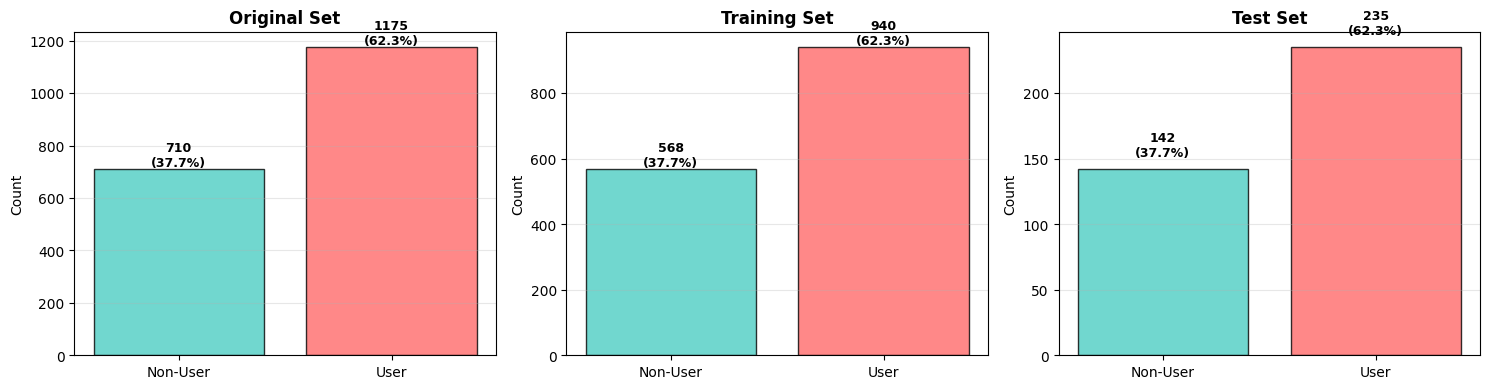

In [25]:
# ============================================================================
# CELL 11: TRAIN-TEST SPLIT (STRATIFIED)
# ============================================================================
"""
Split data 80:20 dengan stratified sampling untuk maintain class proportion.
"""

print("\n" + "="*80)
print("✂️  TRAIN-TEST SPLIT (STRATIFIED)")
print("="*80)

# Stratified split
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # Maintain class proportion
)

print(f"\n📊 Split Configuration:")
print("-"*80)
print(f"   • Test size: {TEST_SIZE * 100}%")
print(f"   • Random state: {RANDOM_STATE}")
print(f"   • Stratified: Yes (by target variable)")

print(f"\n📦 Dataset Splits:")
print("-"*80)
print(f"   • Training set:   {X_train.shape[0]:4d} samples ({X_train.shape[0]/len(X)*100:5.2f}%)")
print(f"   • Test set:       {X_test.shape[0]:4d} samples ({X_test.shape[0]/len(X)*100:5.2f}%)")
print(f"   • Total:          {len(X):4d} samples (100.00%)")

# Verify stratification
train_dist = y_train.value_counts().sort_index()
test_dist = y_test.value_counts().sort_index()
original_dist = y.value_counts().sort_index()

print(f"\n🎯 Class Distribution Verification:")
print("-"*80)
print(f"{'Split':<15s} {'Class 0':>10s} {'Class 1':>10s} {'Ratio':>10s}")
print("-"*80)

for name, dist in [('Original', original_dist), ('Training', train_dist), ('Test', test_dist)]:
    class0_pct = dist[0] / dist.sum() * 100
    class1_pct = dist[1] / dist.sum() * 100
    ratio = dist[0] / dist[1]
    print(f"{name:<15s} {class0_pct:9.2f}% {class1_pct:9.2f}% {ratio:9.2f}:1")

print("\n✅ Stratification successful:")
print("   • Class proportions maintained across splits")
print("   • Ready for modeling!")

# Visual verification
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (split_name, split_y) in enumerate([('Original', y), ('Training', y_train), ('Test', y_test)]):
    ax = axes[idx]
    counts = split_y.value_counts().sort_index()
    
    ax.bar(['Non-User', 'User'], counts, color=['#4ECDC4', '#FF6B6B'], 
           edgecolor='black', alpha=0.8)
    ax.set_title(f'{split_name} Set', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Add percentages
    for i, (count, pct) in enumerate(zip(counts, counts / counts.sum() * 100)):
        ax.text(i, count + 10, f'{count}\n({pct:.1f}%)', 
                ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/15_train_test_split_distribution.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# ============================================================================
# CELL 12: FEATURE STATISTICS SUMMARY
# ============================================================================
"""
Generate comprehensive statistics untuk dokumentasi.
"""

print("\n" + "="*80)
print("📊 FEATURE STATISTICS SUMMARY")
print("="*80)

# Training set statistics
print("\n1️⃣ Training Set Statistics:")
print("-"*80)

# Numeric features statistics
numeric_features = demographic_features_encoded + personality_features + behavioral_features
X_train_numeric = X_train[numeric_features]

print("\nNumeric Features (Demographics + Personality + Behavioral):")
stats_df = X_train_numeric.describe().T
stats_df['missing'] = X_train_numeric.isnull().sum()
display(stats_df.round(3))

# Binary/One-hot features
categorical_features = country_features + ethnicity_features
print(f"\nCategorical Features (One-Hot Encoded):")
print(f"   • Country features: {len(country_features)}")
print(f"   • Ethnicity features: {len(ethnicity_features)}")
print(f"   • All binary (0 or 1)")

# Feature correlation check
print("\n2️⃣ Feature Correlation Analysis:")
print("-"*80)

# High correlation check (potential multicollinearity)
corr_matrix = X_train_numeric.corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    print(f"\n⚠️  High Correlations Detected (|r| > 0.7):")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    display(high_corr_df)
    print("\n   → Consider feature selection or regularization")
else:
    print("\n✅ No high correlations detected (all |r| ≤ 0.7)")
    print("   → Features are relatively independent")

# Target correlation
print("\n3️⃣ Target Correlation Analysis:")
print("-"*80)

# Compute correlation with target
target_corr = X_train_numeric.corrwith(y_train).sort_values(key=abs, ascending=False)
print("\nTop 10 features correlated with target:")
display(target_corr.head(10).round(3))

print("\nBottom 5 features (least correlated with target):")
display(target_corr.tail(5).round(3))


📊 FEATURE STATISTICS SUMMARY

1️⃣ Training Set Statistics:
--------------------------------------------------------------------------------

Numeric Features (Demographics + Personality + Behavioral):


,count,mean,std,min,25%,50%,75%,max,missing
Age_Encoded,1508.0,1.342,1.269,0.000,0.000,1.000,2.000,5.000,0
Gender_Encoded,1508.0,0.505,0.500,0.000,0.000,1.000,1.000,1.000,0
Education_Encoded,1508.0,4.995,1.787,0.000,4.000,5.000,6.000,8.000,0
Nscore,1508.0,-0.011,1.014,-3.157,-0.678,0.043,0.630,3.274,0
Escore,1508.0,0.002,0.984,-3.274,-0.695,0.003,0.638,3.274,0
Oscore,1508.0,0.010,0.989,-3.274,-0.717,-0.019,0.723,2.902,0
Ascore,1508.0,0.004,0.989,-3.464,-0.606,-0.017,0.590,3.157,0
Cscore,1508.0,-0.012,1.004,-3.464,-0.653,-0.007,0.758,3.464,0
Impulsive,1508.0,0.007,0.952,-2.555,-0.711,-0.217,0.530,2.902,0
SS,1508.0,-0.000,0.954,-2.078,-0.526,0.080,0.765,1.922,0



Categorical Features (One-Hot Encoded):
   • Country features: 6
   • Ethnicity features: 6
   • All binary (0 or 1)

2️⃣ Feature Correlation Analysis:
--------------------------------------------------------------------------------

✅ No high correlations detected (all |r| ≤ 0.7)
   → Features are relatively independent

3️⃣ Target Correlation Analysis:
--------------------------------------------------------------------------------

Top 10 features correlated with target:


SS                   0.420
Age_Encoded         -0.400
Oscore               0.370
Impulsive            0.308
Cscore              -0.306
Gender_Encoded       0.274
Education_Encoded   -0.221
Ascore              -0.188
Nscore               0.172
Escore              -0.068
dtype: float64


Bottom 5 features (least correlated with target):


Gender_Encoded       0.274
Education_Encoded   -0.221
Ascore              -0.188
Nscore               0.172
Escore              -0.068
dtype: float64